##LOAD DATA

In [2]:
import pandas as pd

df  = pd.read_csv('UTSClustering.csv',encoding='latin-1')

### ISI DATA

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


## EXPLORE DATA

### INFO DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    137839 non-null  object 
 1   StockCode    137839 non-null  object 
 2   Description  137408 non-null  object 
 3   Quantity     137838 non-null  float64
 4   InvoiceDate  137838 non-null  object 
 5   UnitPrice    137838 non-null  float64
 6   CustomerID   94102 non-null   float64
 7   Country      137838 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.4+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,137838.000000,137838.000000,94102.000000
mean,8.943695,5.180769,15292.544048
std,288.015005,106.172683,1739.318647
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13869.000000
50%,3.000000,2.460000,15192.000000
75%,10.000000,4.210000,16889.000000
max,74215.000000,16888.020000,18283.000000


In [6]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,137839,137839,137408,137838,137838
unique,6631,3260,3189,6011,32
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/6/2010 16:57,United Kingdom
freq,675,742,752,675,126817


In [7]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,431
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,43737
Country,1


### UNIQUE VALUE

In [8]:
# Misalnya dataset kamu bernama df
unique_counts = df.nunique()

print(unique_counts)

InvoiceNo      6631
StockCode      3260
Description    3189
Quantity        355
InvoiceDate    6011
UnitPrice       704
CustomerID     2149
Country          32
dtype: int64


### Missing value

In [9]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,431
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,43737
Country,1


## FEATURE ENGINEERING

### LABELING

In [10]:
from sklearn.preprocessing import LabelEncoder

# 2. Deteksi semua kolom kategorikal (tipe object atau category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 3. Label Encoding untuk setiap kolom kategorikal
label_encoders = {}  # Simpan encoder jika ingin inverse_transform nanti

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_Label'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder

# 4. (Opsional) Hapus kolom aslinya
df.drop(columns=categorical_cols, inplace=True)

# 5. Tampilkan 5 baris pertama hasil akhir
print(df.head())

   Quantity  UnitPrice  CustomerID  InvoiceNo_Label  StockCode_Label  \
0       6.0       2.55     17850.0                0             2788   
1       6.0       3.39     17850.0                0             2146   
2       8.0       2.75     17850.0                0             2352   
3       6.0       3.39     17850.0                0             2304   
4       6.0       3.39     17850.0                0             2303   

   Description_Label  InvoiceDate_Label  Country_Label  
0               3025               1451             31  
1               3032               1451             31  
2                763               1451             31  
3               1524               1451             31  
4               2335               1451             31  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Quantity           137838 non-null  float64
 1   UnitPrice          137838 non-null  float64
 2   CustomerID         94102 non-null   float64
 3   InvoiceNo_Label    137839 non-null  int64  
 4   StockCode_Label    137839 non-null  int64  
 5   Description_Label  137839 non-null  int64  
 6   InvoiceDate_Label  137839 non-null  int64  
 7   Country_Label      137839 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 8.4 MB


### KORELASI

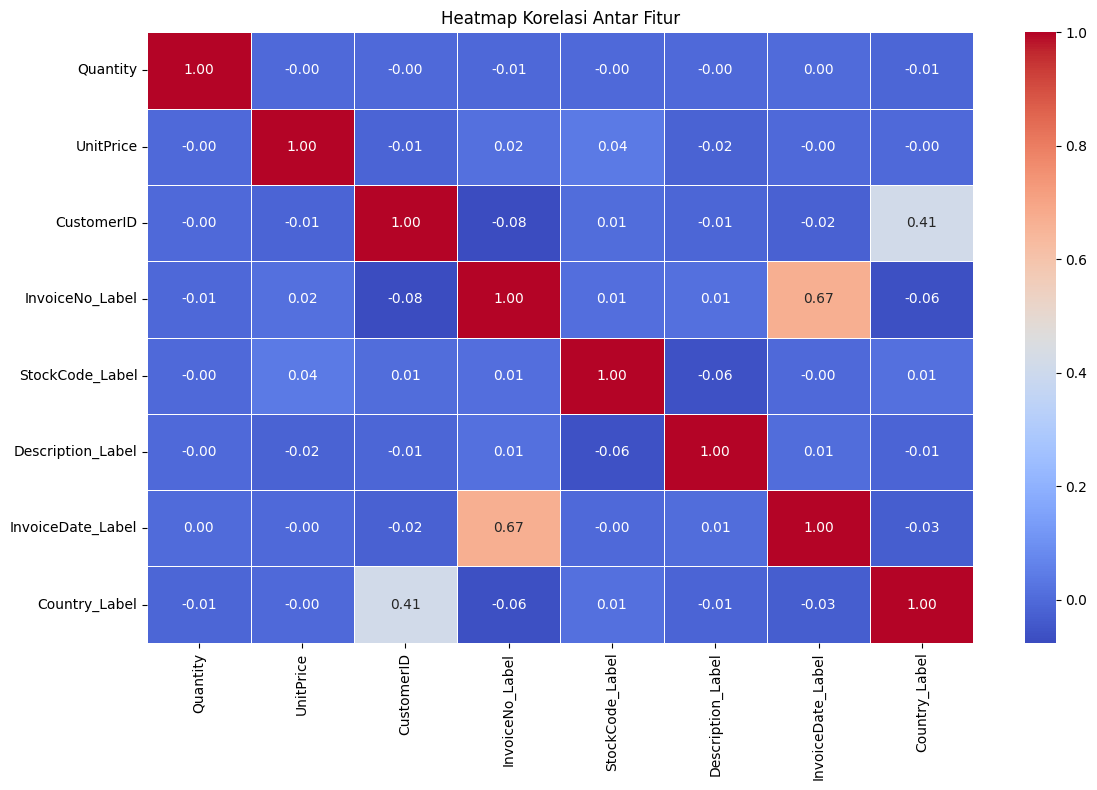

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Deteksi dan encode kolom kategorikal
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_Label'] = le.fit_transform(df[col])

# 3. Hapus kolom aslinya
df.drop(columns=categorical_cols, inplace=True)

# 4. Hitung korelasi
correlation_matrix = df.corr(numeric_only=True)

# 6. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

## FEATURE SELECTION

### DELETING COLUMNS

Reason : To much unique value to handle so we gotta clean this shit

In [13]:
#masukan ulang lagi untuk mengupdate kolom countnya
unique_counts = df.nunique()

# Pilih kolom dengan unique value > 1000
cols_to_drop = unique_counts[unique_counts > 1700].index

# Hapus kolom-kolom tersebut
df.drop(columns=cols_to_drop, inplace=True)

# Tampilkan kolom yang dihapus
print("Kolom yang dihapus karena unique > 1000:")
print(list(cols_to_drop))

# Cek hasil akhir
print("Kolom yang tersisa:", df.columns.tolist())

Kolom yang dihapus karena unique > 1000:
['CustomerID', 'InvoiceNo_Label', 'StockCode_Label', 'Description_Label', 'InvoiceDate_Label']
Kolom yang tersisa: ['Quantity', 'UnitPrice', 'Country_Label']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Quantity       137838 non-null  float64
 1   UnitPrice      137838 non-null  float64
 2   Country_Label  137839 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.2 MB


In [15]:
df.head()

,Quantity,UnitPrice,Country_Label
0,6.0,2.55,31
1,6.0,3.39,31
2,8.0,2.75,31
3,6.0,3.39,31
4,6.0,3.39,31


### SEARCHING DUPLICATE

In [16]:
# Menghitung total duplikat
total_duplicates = df.duplicated().sum()

# Menampilkan jumlah duplikat
print("Total jumlah duplikat:", total_duplicates)

Total jumlah duplikat: 131366


## MODELING

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Quantity       137838 non-null  float64
 1   UnitPrice      137838 non-null  float64
 2   Country_Label  137839 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.2 MB


KMeans Silhouette Score: 0.9512309971987236, Davies-Bouldin Index: 0.19636128060110059, Calinski-Harabasz Score: 20495.85529497273
DBSCAN Silhouette Score: 0.9548426322139754, Davies-Bouldin Index: 0.397871740044174, Calinski-Harabasz Score: 17048.253266453565
Gaussian Mixture Silhouette Score: 0.753889337607737, Davies-Bouldin Index: 0.659381140727564, Calinski-Harabasz Score: 10100.305465942822


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score: -0.6919141361735526, Davies-Bouldin Index: 1.7774172765680811, Calinski-Harabasz Score: 1.3926077084772364
Best Model: DBSCAN with Silhouette Score: 0.9548426322139754


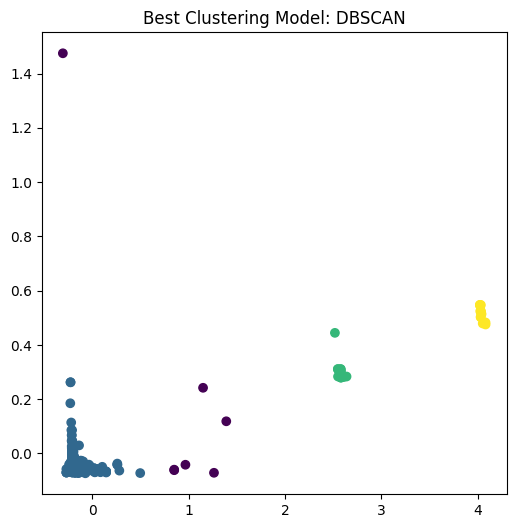

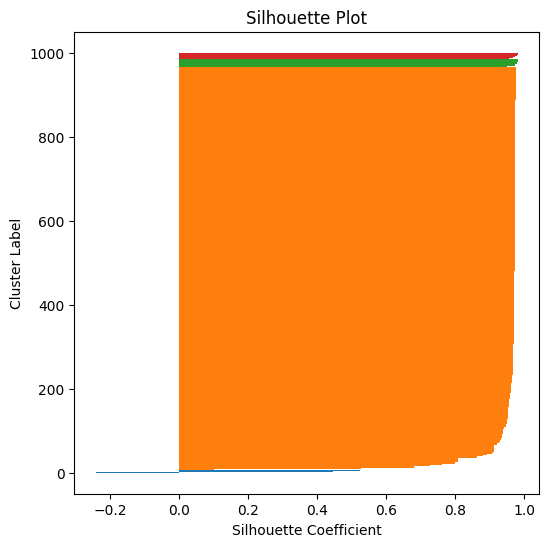

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling NaN values
from scipy.cluster.hierarchy import linkage, dendrogram # Import for dendrogram

# Misalkan df adalah dataset yang sudah ada
X = df  # Dataset yang sudah ada

# Standarisasi data agar model lebih baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaN with the mean of the column
X_scaled = imputer.fit_transform(X_scaled) # Apply the imputer to the scaled data

# Reduksi dimensi dengan PCA menjadi 2 untuk visualisasi yang lebih cepat
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fungsi untuk menampilkan hasil clustering
def plot_clusters(X, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.title(title)
    plt.show()

# Fungsi untuk menampilkan Silhouette plot
def plot_silhouette(X, y_pred):
    from sklearn.metrics import silhouette_samples
    silhouette_vals = silhouette_samples(X, y_pred)
    y_lower, y_upper = 0, 0
    plt.figure(figsize=(6,6))
    for i, c in enumerate(np.unique(y_pred)):
        c_silhouette_vals = silhouette_vals[y_pred == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0)
        y_lower += len(c_silhouette_vals)
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster Label")
    plt.title("Silhouette Plot")
    plt.show()

# Fungsi untuk menerapkan clustering dan evaluasi
def apply_clustering(X_pca):
    best_model = None
    best_score = -1  # Untuk menyimpan nilai silhouette terbaik
    best_pred = None
    model_scores = {}  # Untuk menyimpan hasil dari masing-masing model

    # Menggunakan subset data untuk mempercepat perhitungan (hanya untuk testing dan pengujian awal)
    sample_size = min(1000, len(X_pca))
    X_sample = X_pca[:sample_size]

    # 1. KMeans
    kmeans = KMeans(n_clusters=4, n_init=10)  # Removed n_jobs parameter
    y_kmeans = kmeans.fit_predict(X_sample)
    kmeans_score = silhouette_score(X_sample, y_kmeans)
    db_index_kmeans = davies_bouldin_score(X_sample, y_kmeans)
    ch_score_kmeans = calinski_harabasz_score(X_sample, y_kmeans)
    print(f"KMeans Silhouette Score: {kmeans_score}, Davies-Bouldin Index: {db_index_kmeans}, Calinski-Harabasz Score: {ch_score_kmeans}")
    model_scores["KMeans"] = kmeans_score
    if kmeans_score > best_score:
        best_score = kmeans_score
        best_model = "KMeans"
        best_pred = y_kmeans

    # 2. DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=10, n_jobs=-1)  # n_jobs=-1 untuk paralelisme
    y_dbscan = dbscan.fit_predict(X_sample)
    dbscan_score = silhouette_score(X_sample, y_dbscan) if len(set(y_dbscan)) > 1 else -1
    db_index_dbscan = davies_bouldin_score(X_sample, y_dbscan) if len(set(y_dbscan)) > 1 else -1
    ch_score_dbscan = calinski_harabasz_score(X_sample, y_dbscan) if len(set(y_dbscan)) > 1 else -1
    print(f"DBSCAN Silhouette Score: {dbscan_score}, Davies-Bouldin Index: {db_index_dbscan}, Calinski-Harabasz Score: {ch_score_dbscan}")
    model_scores["DBSCAN"] = dbscan_score
    if dbscan_score > best_score:
        best_score = dbscan_score
        best_model = "DBSCAN"
        best_pred = y_dbscan

    # 3. Gaussian Mixture
    gmm = GaussianMixture(n_components=4)
    y_gmm = gmm.fit_predict(X_sample)
    gmm_score = silhouette_score(X_sample, y_gmm)
    db_index_gmm = davies_bouldin_score(X_sample, y_gmm)
    ch_score_gmm = calinski_harabasz_score(X_sample, y_gmm)
    print(f"Gaussian Mixture Silhouette Score: {gmm_score}, Davies-Bouldin Index: {db_index_gmm}, Calinski-Harabasz Score: {ch_score_gmm}")
    model_scores["Gaussian Mixture"] = gmm_score
    if gmm_score > best_score:
        best_score = gmm_score
        best_model = "Gaussian Mixture"
        best_pred = y_gmm

    # 4. Spectral Clustering (Hanya diterapkan jika dataset lebih kecil dan cukup efisien)
    spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_jobs=-1)
    y_spectral = spectral.fit_predict(X_sample)
    spectral_score = silhouette_score(X_sample, y_spectral)
    db_index_spectral = davies_bouldin_score(X_sample, y_spectral)
    ch_score_spectral = calinski_harabasz_score(X_sample, y_spectral)
    print(f"Spectral Clustering Silhouette Score: {spectral_score}, Davies-Bouldin Index: {db_index_spectral}, Calinski-Harabasz Score: {ch_score_spectral}")
    model_scores["Spectral Clustering"] = spectral_score
    if spectral_score > best_score:
        best_score = spectral_score
        best_model = "Spectral Clustering"
        best_pred = y_spectral

    # Menampilkan hasil clustering dari model terbaik
    print(f"Best Model: {best_model} with Silhouette Score: {best_score}")

    # Visualisasi Cluster Scatter Plot
    plot_clusters(X_sample, best_pred, title=f"Best Clustering Model: {best_model}")

    # Menampilkan Silhouette plot
    plot_silhouette(X_sample, best_pred)

    # Dendrogram untuk Agglomerative Clustering
    # Jika model terbaik adalah Agglomerative, tampilkan dendrogram
    if best_model == "Agglomerative Clustering":
        linked = linkage(X_sample, 'single')
        plt.figure(figsize=(10, 7))
        dendrogram(linked)
        plt.title("Dendrogram for Agglomerative Clustering")
        plt.show()

# Menjalankan clustering dan evaluasi
apply_clustering(X_pca)